In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
import sys
import os

p = !pwd
p = os.path.dirname(p[0])
if p not in sys.path:
    sys.path.append(p)

from experanto.experiment import Experiment
from experanto.interpolators import Interpolator

In [3]:
# root_folder = '/Volumes/datasets/funct_foundational_data/mocked_data/dataset0'
root_folder = '/home/nibecker/datasets/mocked_data/dataset0'
sampling_rate = 10  # Hz?
e = Experiment(root_folder, sampling_rate)

Parsing responses data... (59814,)
done
Parsing running_speed data... (200011,)
done
Parsing screen data... done
Parsing eye_tracker data... (100001,)
done


In [4]:
e._devices

{'responses': [<experanto.interpolators.SequenceInterpolator at 0x155528153350>],
 'running_speed': [<experanto.interpolators.SequenceInterpolator at 0x155550634910>],
 'screen': [<experanto.interpolators.VideoInterpolator at 0x1555281bc150>,
 'eye_tracker': [<experanto.interpolators.SequenceInterpolator at 0x155528003110>]}

In [12]:
b = e.get_sample_index(e._devices["screen"][0].timestamps[0])
data = e[b:b+10]
# print(data)

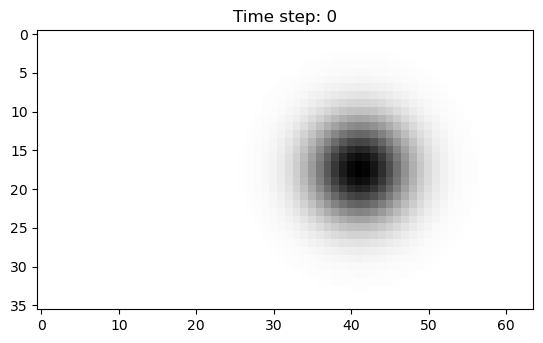

In [13]:
# Show part of the screen
time_steps = 100
b = e.get_sample_index(e._devices["screen"][1].timestamps[100])
video = e[b:b+time_steps]["screen"]

fig, ax = plt.subplots()
im = ax.imshow(video[0], cmap='gray')

def update(frame):
    im.set_data(video[frame])
    ax.set_title(f'Time step: {frame}')
    return [im]
    
ani = animation.FuncAnimation(fig, update, frames=range(time_steps), repeat=False)
HTML(ani.to_jshtml())

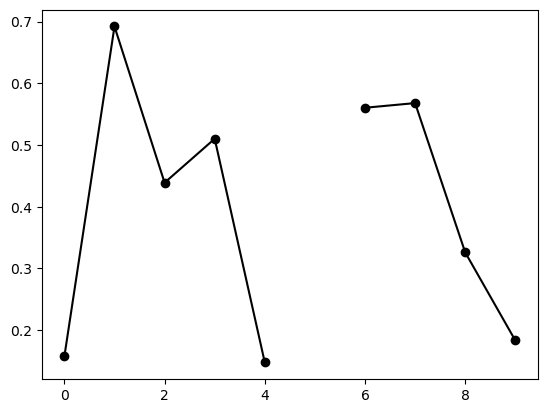

In [14]:
plt.plot(data["running_speed"], 'o-k')

In [38]:
vid1 = e[b:b+time_steps]["screen"]
vid2 = e[b:b+time_steps,"screen"]
np.sum(vid1 - vid2)

0.0